In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


## Reading a csv file by giving custom column names

In [2]:
df = pd.read_csv("Zomoto.CSV", names=["rest_id", "url", "address", "rest_name", "online_order", "Table Booking Availability", "Ratings out of 5", "Voters Count", "Phone No",
                         "location", "Rest_type", "Dish Varieties", "Cuisines", "Average Cost for two", "Detail Reviews", "Menu item", "Listed type in ZOMOTO", "Listed City in ZOMOTO"])


In [3]:
df.drop(index=0, inplace=True)

In [4]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


## Checking for the garbage values in "rest_name":

In [5]:
# pattern for detecting error values
pattern = r'[^a-zA-Z0-9@&()!,.\'\s -]'

# Use the pattern to filter out error values
df[df['rest_name'].str.contains(pattern)].head(20)


,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
103,43061.0,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,Yes,No,4.1 /5,118,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Desserts,MG Road
266,17166.0,https://www.zomato.com/bangalore/l-81-cafe-hsr...,"Sector 6, HSR Layout, HSR",#L-81 Cafe,Yes,No,3.9/5,48,+91 9986210891,HSR,Quick Bites,Burgers,"Fast Food, Beverages",400,"[('Rated 4.0', 'RATED\n This little cafe is s...",[],Dine-out,HSR
273,24260.0,https://www.zomato.com/bangalore/draggers-caf%...,"527, 4th Floor, 4th Cross, CMR Road, 2nd Block...",Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.1/5,274,+91 9632027110\r\n+91 9741385757,Kalyan Nagar,Cafe,"Club Sandwich, Burgers, Basil Chicken, Pasta, ...","Cafe, Continental, North Indian",900,"[('Rated 4.0', 'RATED\n This was a accidental...","['Onion Rings', 'Drums of Heaven', 'Sesame Hot...",Delivery,Kalyan Nagar
334,32221.0,https://www.zomato.com/bangalore/caf%C3%A9-s-k...,"752, 1st Floor, 80 Feet Road, Koramangala 4th ...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© S,No,No,3.2 /5,4,+91 8030752750\r\n080 25523350,Koramangala 4th Block,Cafe,NaN,"Cafe, American, European",600,"[('Rated 3.0', 'RATED\n We ordered. I hv neve...",[],Cafes,Koramangala 6th Block
383,19330.0,https://www.zomato.com/bangalore/1131-bar-kitc...,"100 Feet Road, HAL 2nd Stage, Indiranagar, Ban...",1131 Bar + Kitchen,No,Yes,4.6/5,2785,080 49652166,Indiranagar,"Bar, Casual Dining","Pizza, Chocolate Cake, Cocktails, Beer, Nachos...","Continental, Asian, Italian, North Indian","1,500","[('Rated 5.0', 'RATED\n This rooftop restaura...",[],Pubs and bars,Indiranagar
809,14776.0,https://www.zomato.com/bangalore/wafl-caf%C3%A...,"G1 Smart Avenue, 28, Residency Road, Bangalore",WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.0/5,85,+91 9740780105,Residency Road,"Dessert Parlor, Quick Bites","Waffles, Pie, Corn Dog","Cafe, Fast Food, Desserts, Beverages",400,"[('Rated 5.0', ""RATED\n I have ordered a few ...","['Chocolate Overloaded Hong Kong Wafl', 'Spicy...",Delivery,Frazer Town
842,14776.0,https://www.zomato.com/bangalore/wafl-caf%C3%A...,"G1 Smart Avenue, 28, Residency Road, Bangalore",WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.0/5,85,+91 9740780105,Residency Road,"Dessert Parlor, Quick Bites","Waffles, Pie, Corn Dog","Cafe, Fast Food, Desserts, Beverages",400,"[('Rated 5.0', ""RATED\n I have ordered a few ...","['Chocolate Overloaded Hong Kong Wafl', 'Spicy...",Delivery,Frazer Town
881,885.0,https://www.zomato.com/bangalore/refuel-banner...,"7, Ground Floor, RR Commercial Complex, Akshay...",#refuel,Yes,No,3.7/5,37,+91 8971227222,Bannerghatta Road,Cafe,"Thick Shakes, Sandwiches, Pasta, Mocktails","Cafe, Beverages",400,"[('Rated 3.0', 'RATED\n We ordered for Schezw...","['Kit Kat Thick Shake', 'Ferrero Rocher Thick ...",Cafes,Bannerghatta Road
1082,1256.0,https://www.zomato.com/bangalore/24-7-food-ser...,"21/22, Saifee Apartment, 5th Cross, 22nd Main ...",24/7 Food Service,Yes,No,3.0/5,7,+91 7795513215\r\r\n+91 9945052352,JP Nagar,"Takeaway, Delivery",NaN,"South Indian, North Indian, Fast Food",300,"[('Rated 1.0', 'RATED\n I don?t recommend thi...","['Murg Tikka Bowl', 'Chicken Fry', 'Phulka', '...",Delivery,Bannerghatta Road
1138,42260.0,https://www.zomato.com/bangalore/moto-store-ca...,"9, Lake Square, Tank Road, Ulsoor, Bangalore",Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,No,4.2 /5,383,080 49653126,Ulsoor,Cafe,"Wedges, Maggi, Burgers, Waffles, Margherita Pi...","Pizza, Italian, Cafe, Burger, Fin

## Checking the shape of data, we can see it has 10000 rows and 18 columns

In [6]:
df.shape  # no. of rows and columns

(10000, 18)

### Checking the datatype of the attributes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  float64
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8528 non-null   object 
 7   Voters Count                10000 non-null  object 
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        994

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Working on column 'Ratings out of 5'

In [8]:
df['Ratings out of 5'] = df['Ratings out of 5'].str.split('/').str[0]


# we fetched out the data before '/'

In [9]:
df.head()

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Numeric Value columns had the datatype as object, we need to convert back it into the numeric format:

In [10]:
df['Ratings out of 5'] = pd.to_numeric(df['Ratings out of 5'], errors="coerce")
df['Voters Count'] = pd.to_numeric(df['Voters Count'], errors="coerce")
df['Average Cost for two'] = pd.to_numeric(df['Average Cost for two'], errors="coerce")

In [11]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221.0,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422.0,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032.0,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635.0,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424.0,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking the datatype to verify that numeric column got converted from object to numeric

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  float64
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8118 non-null   float64
 7   Voters Count                10000 non-null  int64  
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        858

## converting the id from float to integer

In [13]:
df['rest_id'] = df['rest_id'].astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rest_id                     10000 non-null  Int64  
 1   url                         10000 non-null  object 
 2   address                     10000 non-null  object 
 3   rest_name                   10000 non-null  object 
 4   online_order                10000 non-null  object 
 5   Table Booking Availability  10000 non-null  object 
 6   Ratings out of 5            8118 non-null   float64
 7   Voters Count                10000 non-null  int64  
 8   Phone No                    9764 non-null   object 
 9   location                    9997 non-null   object 
 10  Rest_type                   9953 non-null   object 
 11  Dish Varieties              4642 non-null   object 
 12  Cuisines                    9995 non-null   object 
 13  Average Cost for two        858

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking for the duplicate rows in our data

In [15]:
df.shape  ## Verifying the shape of original data

(10000, 18)

In [16]:
df[df.duplicated()].shape   ## Checking the number of duplicate rows, we can see that there is 909 duplicate rows

(909, 18)

In [17]:
df.drop_duplicates(inplace=True)  ## deleting the duplicate rows

In [18]:
df.shape   ## post deleting checking the size of rows again

(9091, 18)

In [19]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Replacing Garbage Values in below columns

In [20]:
df['Menu item'].replace({'[]' : np.NaN, "" : np.NaN}, inplace=True)
df['Detail Reviews'].replace({'[]' : np.NaN, "" : np.NaN}, inplace=True)

In [21]:
df.head(5)

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
1,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",NaN,Dine-out,Electronic City
2,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,NaN,"[('Rated 1.0', 'RATED\n Expected a good night...",NaN,Dine-out,MG Road
3,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",NaN,Delivery,HSR
4,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",NaN,Dine-out,Whitefield
5,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NaN,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,NaN,NaN,Dine-out,JP Nagar


## Removing blank spaces from lead and trail for column "Restaurant Name"

In [22]:
df['rest_name'] = df['rest_name'].str.strip()

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking for some more garbage values in the rest_name column

In [23]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© S
338,33536,Cafe Remix


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Removing the garbage values

In [24]:

# Function to clean the rest_name column
def clean_restaurant_name(name):
    cleaned_name = re.sub('[^A-Za-z0-9.!`&~@\'\s -]', '', name)    
    return cleaned_name.strip()

# Clean the rest_name column
df['rest_name'] = df['rest_name'].apply(clean_restaurant_name)

In [25]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,Caf Mor'ish
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,Caf S
338,33536,Cafe Remix


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## We found that the Cafe spelling was wrong for few restaurant names

In [26]:

df['rest_name'] = df['rest_name'].str.replace(r'\bCaf\b', 'Cafe')

C:\Users\Dell\AppData\Local\Temp\ipykernel_12872\3958553127.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['rest_name'] = df['rest_name'].str.replace(r'\bCaf\b', 'Cafe')


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Using above code we replaced the CAF as CAFE

In [27]:
df[df['rest_name'].str.startswith("Caf")].loc[:, ['rest_id','rest_name']].head(15)

,rest_id,rest_name
9,29058,Cafe 58
98,48351,Cafe @ Elanza
103,43061,Cafe Mor'ish
132,17608,Cafe Coffee Day
159,34860,Cafe 221B
201,15457,Cafe Iftar
240,49891,Cafe Jezve
304,10992,Caffe Pascucci
334,32221,Cafe S
338,33536,Cafe Remix


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking for Other missing values in non numeric columns

In [28]:
df[df['location'].isnull()]

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
3254,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buffet,Koramangala 6th Block
3763,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Rajajinagar
9160,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Kammanahalli


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## We found out that there were some missing values in column "location", we replaced it with city names listed in zomoto

In [29]:
missing_ids = df[df['location'].isnull()].loc[:, "rest_id"]
missing_ids = missing_ids.tolist()

for rest_id in missing_ids:
    df.loc[df['rest_id'] == rest_id, 'location'] = df.loc[df['rest_id'] == rest_id, 'Listed City in ZOMOTO']

In [30]:
df[df['rest_id'].isin(missing_ids)]

,rest_id,url,address,rest_name,online_order,Table Booking Availability,Ratings out of 5,Voters Count,Phone No,location,Rest_type,Dish Varieties,Cuisines,Average Cost for two,Detail Reviews,Menu item,Listed type in ZOMOTO,Listed City in ZOMOTO
3254,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,NaN,0,NaN,Koramangala 6th Block,NaN,NaN,NaN,NaN,NaN,NaN,Buffet,Koramangala 6th Block
3763,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,NaN,0,NaN,Rajajinagar,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Rajajinagar
9160,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,NaN,0,NaN,Kammanahalli,NaN,NaN,NaN,NaN,NaN,NaN,Dine-out,Kammanahalli


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking Null Values in Address Column

In [31]:
df['address'].isnull().sum()

0

## Checking Null Values in 'Ratings out of 5' Column

In [32]:
df['Ratings out of 5'].isnull().sum()


1723

## Checking Null Values in 'Average Cost for two' Column

In [33]:
df['Average Cost for two'].isnull().sum()

1275

## Checking Null Values in 'Voters Count' Column

In [34]:
df['Voters Count'].isnull().sum()

0

# Filling the missing values for 'Ratings out of 5' using logic

In [35]:
mean_values_ratings = df.groupby('rest_name')['Ratings out of 5'].transform('mean')

df['Ratings out of 5'].fillna(mean_values_ratings, inplace=True)

### Replacing the remaining null values for "Ratings out of 5" with median

In [36]:
df['Ratings out of 5'].fillna(df['Ratings out of 5'].median(), inplace=True)

In [37]:
df['Ratings out of 5'].isnull().sum()

0

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

# Filling the missing values for 'Average cost for 2' using logic

In [38]:
mean_values_ratings = df.groupby('rest_name')['Average Cost for two'].transform('mean')

df['Average Cost for two'].fillna(mean_values_ratings, inplace=True)

In [39]:
df['Average Cost for two'].fillna(df['Average Cost for two'].median(), inplace=True)

In [40]:
df['Average Cost for two'].isnull().sum()

0

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking null values in below columns

In [41]:
df['Table Booking Availability'].isnull().sum()

0

In [42]:
df['online_order'].isnull().sum()

0

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Checking null values in "Rest_type" column

In [43]:
df['Rest_type'].isnull().sum()

44

### As we see that rest type has missing values, replacing the missing values in 'rest_type' with last valid value of "rest_type" having same "rest_name"

In [44]:
df['Rest_type'] = df.groupby('rest_name')['Rest_type'].fillna(method='ffill')

In [45]:
df['Rest_type'].isnull().sum()

35

### We replaced 9 missing values and rest values cannot be replaced as we cannot enter any missing value for rest_type on our own 

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

# Questions : 

## Q2. Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?

In [46]:
df_Q2 = df.groupby(['rest_name']).agg({"Voters Count" : "sum", 'Ratings out of 5' : "mean"})


## Adding new column in dfQ2 showing value counts of total hotel chain of respective brand
df_Q2["no of restaurants"] = df["rest_name"].value_counts()



### Sorting on basis of Voters Count...... as high number voters signify higher number of public response and also higher public preference

In [47]:
df_Q2.sort_values(by=["Voters Count", 'Ratings out of 5'], ascending=False).head(10)

,Voters Count,Ratings out of 5,no of restaurants
rest_name,,,
Onesta,64814,4.426667,15
Truffles,59814,4.580000,10
Hammered,34320,4.612500,10
Arbor Brewing Company,33583,4.500000,4
Prost Brew Pub,31435,4.500000,4
The Black Pearl,27916,4.733333,3
Empire Restaurant,25562,4.066667,9
The Biere Club,24456,4.300000,7
Barbeque Nation,22965,4.666667,6


### Top 10 Restaurants based on the distribution(frequency)

In [48]:
df_Q2.sort_values("no of restaurants", ascending=False).head(10)

,Voters Count,Ratings out of 5,no of restaurants
rest_name,,,
Cafe Coffee Day,676,3.364286,17
Baskin Robbins,728,3.581250,16
McDonald's,3994,3.556250,16
Onesta,64814,4.426667,15
Keventers,1488,3.706667,15
The Chocolate Heaven,1038,3.580000,14
KFC,6153,3.492857,14
Petoo,881,3.846154,14
Sweet Truth,489,3.984615,13


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q3.	How many restaurants do not accept online orders?

In [49]:
df["online_order"].value_counts()

Yes    5423
No     3668
Name: online_order, dtype: int64

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q4.	What is the ratio b/w restaurants that provide and do not provide table booking?

In [50]:
df['Table Booking Availability'].value_counts()

No     7967
Yes    1124
Name: Table Booking Availability, dtype: int64

In [51]:
print("The ratio b/w restaurants that provide and do not provide table booking is : \n")

print(round((df['Table Booking Availability'].value_counts()[1]/df['Table Booking Availability'].value_counts()[0]), 4))

The ratio b/w restaurants that provide and do not provide table booking is : 

0.1411


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q5. Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

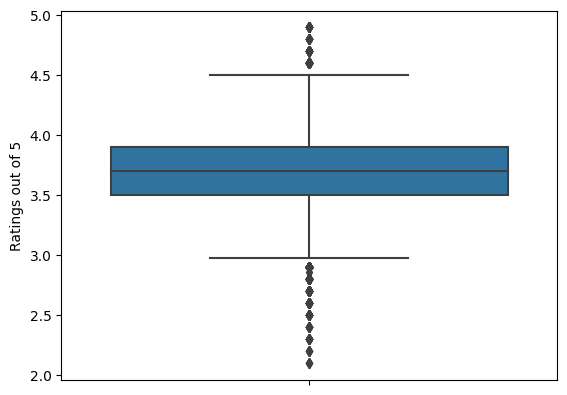

In [52]:
sns.boxplot(data=df, y='Ratings out of 5')
plt.show()

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q6.	Online and Offline orders restaurants percentage.

In [53]:
YES = df['online_order'].value_counts()[0]
NO = df['online_order'].value_counts()[1]
Total = df['online_order'].value_counts().sum()


print(f"{round(((YES / Total) * 100), 2)}% of Restaurants accept online order.")
print("&")
print(f"{round(((NO / Total) * 100), 2)}% of Restaurants does not accept online order.")

59.65% of Restaurants accept online order.
&
40.35% of Restaurants does not accept online order.


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q7. Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.

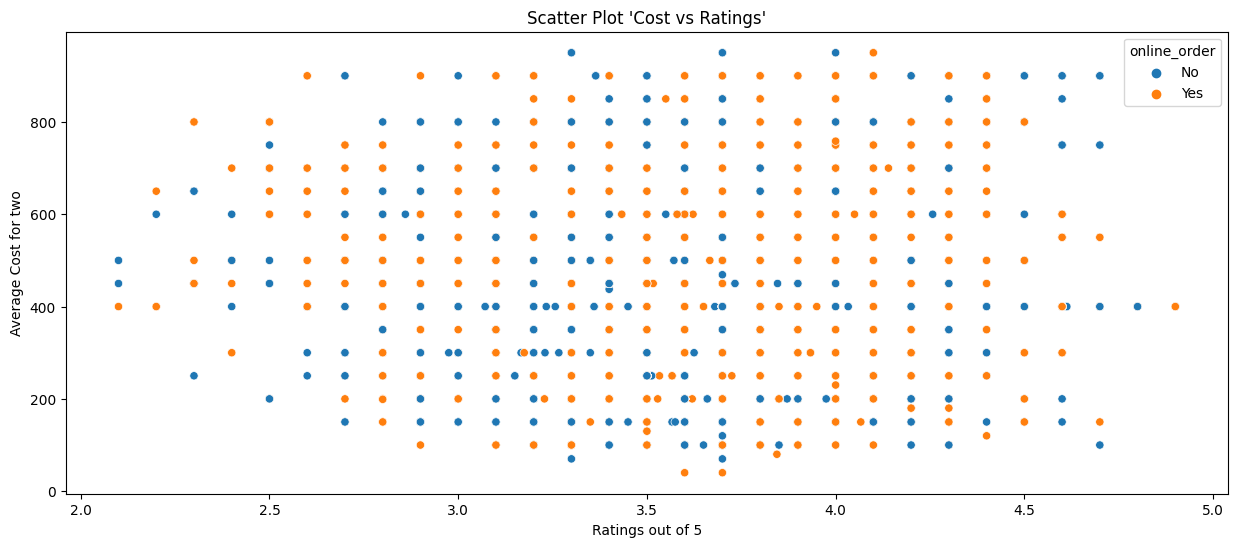

In [54]:
plt.figure(figsize=(15, 6))

sns.scatterplot(y=df['Average Cost for two'], x=df['Ratings out of 5'], hue=df['online_order'])

plt.title(label="Scatter Plot 'Cost vs Ratings'")
plt.show()

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.

In [55]:
def find_distribution(column_name):
    distribution = df[column_name].value_counts().sort_index()
    return distribution

# List of columns to analyze
columns_to_analyze = ['Voters Count', 'Average Cost for two']

# Use a for loop to find and display the distribution for each column
for column in columns_to_analyze:
    print(f"Distribution for '{column}':")
    distribution = find_distribution(column)
    print(distribution)
    print()

Distribution for 'Voters Count':
0        1721
1           2
2           2
4         195
5         130
         ... 
10471       1
14654       1
14690       1
14694       1
14956       1
Name: Voters Count, Length: 1293, dtype: int64

Distribution for 'Average Cost for two':
40.000000        2
70.000000        2
80.000000        1
100.000000     171
120.000000       2
130.000000       2
150.000000     372
180.000000       3
199.000000       1
200.000000     852
230.000000       1
250.000000     530
300.000000    1328
350.000000     302
400.000000    2370
437.500000       1
450.000000     276
469.000000       1
500.000000     847
550.000000     143
600.000000     656
650.000000     152
700.000000     378
750.000000     123
758.333333       2
800.000000     389
850.000000      34
900.000000     139
950.000000      11
Name: Average Cost for two, dtype: int64



*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## 9.	Which are the most common restaurant type in Banglore?

In [56]:
df['Rest_type'].value_counts().sort_values(ascending=False).head(10)

Quick Bites           3300
Casual Dining         1835
Cafe                   644
Delivery               459
Dessert Parlor         409
Takeaway, Delivery     395
Bakery                 205
Casual Dining, Bar     190
Beverage Shop          140
Bar                    120
Name: Rest_type, dtype: int64

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?

In [57]:
ans = df[df["online_order"] == "Yes"].loc[:, "Voters Count"].value_counts().sum(
) - df[df["online_order"] == "No"].loc[:, "Voters Count"].value_counts().sum()

print("The difference between the votes of restaurants accepting and not accepting online orders is :", ans)


The difference between the votes of restaurants accepting and not accepting online orders is : 1755


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q11.	Which are the most common restaurant type in Banglore?

In [58]:
df['Rest_type'].value_counts().sort_values(ascending=False).head(10)

Quick Bites           3300
Casual Dining         1835
Cafe                   644
Delivery               459
Dessert Parlor         409
Takeaway, Delivery     395
Bakery                 205
Casual Dining, Bar     190
Beverage Shop          140
Bar                    120
Name: Rest_type, dtype: int64

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q12. Find the Best budget Restaurants in any location.

In [59]:
budget_rest = df[((df['Average Cost for two'] >= 400) & (df['Average Cost for two'] <= 460) & (df['Ratings out of 5'] > 4) & (
    df['Voters Count'] > 5000))].loc[:, ['rest_name', 'Rest_type', 'location', 'Average Cost for two', 'Ratings out of 5', 'Voters Count']]

budget_rest.drop_duplicates(inplace=True)

budget_rest.groupby(by=['rest_name', 'location', 'Rest_type']).agg(
    {'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'})


,,,Average Cost for two,Ratings out of 5,Voters Count
rest_name,location,Rest_type,,,
AB's - Absolute Barbecues,BTM,Casual Dining,400.0,4.9,19317
Arbor Brewing Company,Brigade Road,"Pub, Microbrewery",400.0,4.5,25201
Barbeque Nation,Indiranagar,Casual Dining,400.0,4.7,7152
Biergarten,Whitefield,"Microbrewery, Pub",400.0,4.7,7064
Big Pitcher,Old Airport Road,"Pub, Microbrewery",400.0,4.7,9041
Church Street Social,Church Street,Lounge,400.0,4.3,7584
Fenny's Lounge And Kitchen,Koramangala 7th Block,"Bar, Casual Dining",400.0,4.5,12762
Hard Rock Cafe,St. Marks Road,"Casual Dining, Bar",400.0,4.5,15828
Hoot,Sarjapur Road,"Microbrewery, Pub",400.0,4.2,14523


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## 13.	Top quick bites restaurant chains in Banglore.

In [60]:
top_quick_bite_rest = df[(df['Rest_type'] == 'Quick Bites') & (df['Ratings out of 5'] > 4) & (
    df['Voters Count'] > 1000)].loc[:, ['rest_name', 'location', 'Average Cost for two', 'Ratings out of 5', 'Voters Count']]

top_quick_bite_rest.drop_duplicates(inplace=True)

top_quick_bite_rest.groupby(by=['rest_name', 'location']).agg(
    {'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'})


,,Average Cost for two,Ratings out of 5,Voters Count
rest_name,location,,,
CTR,Malleshwaram,150.0,4.7,4408
Eat Street,Koramangala 6th Block,600.0,4.2,3065
Kabab Magic,Basavanagudi,400.0,4.1,1720
Taco Bell,Koramangala 6th Block,600.0,4.1,3922
Veena Stores,Malleshwaram,150.0,4.5,2416


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## 14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?

In [61]:
popular_casual_dining_rest = pd.DataFrame(df[df['Rest_type'] == 'Casual Dining'].groupby(
    by=['rest_name']).agg({'Average Cost for two': 'mean', 'Ratings out of 5': 'mean', 'Voters Count': 'sum'}))

popular_casual_dining_rest.reset_index(inplace=True)

df2 = popular_casual_dining_rest[(popular_casual_dining_rest['Ratings out of 5'] > 4.3) & (
    popular_casual_dining_rest['Voters Count'] > 4000)]

df2['popularity'] = df2['Ratings out of 5'] * df2['Voters Count']


C:\Users\Dell\AppData\Local\Temp\ipykernel_12872\2782809070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['popularity'] = df2['Ratings out of 5'] * df2['Voters Count']


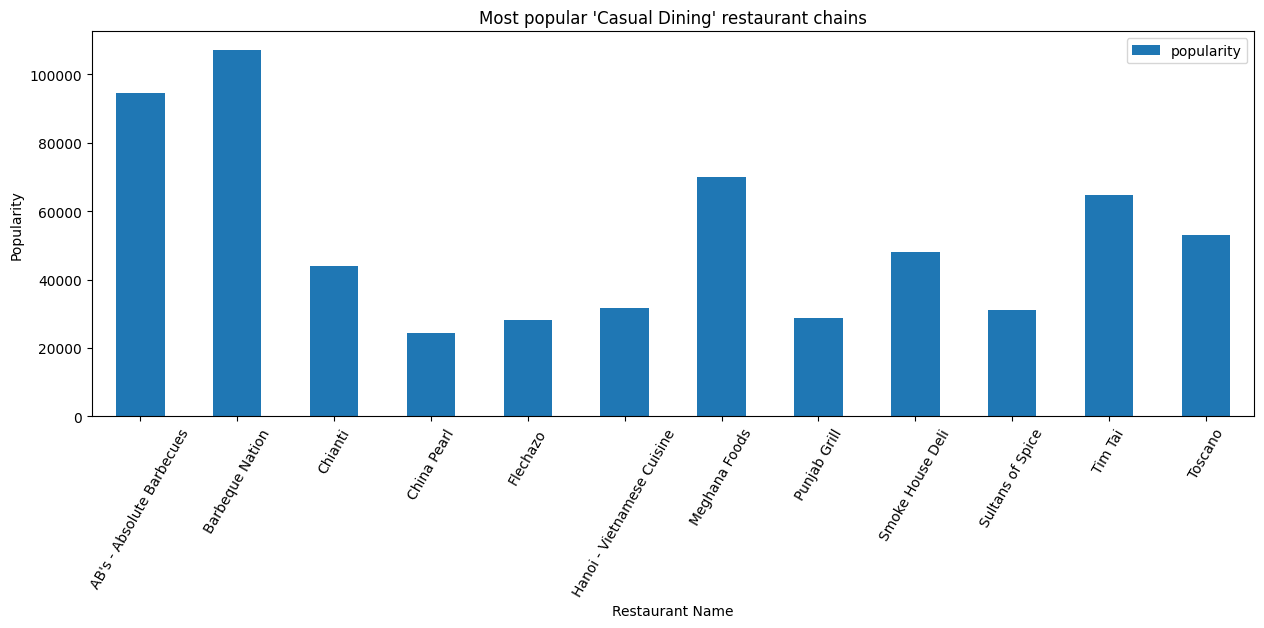

In [62]:
df2.plot(kind='bar', x='rest_name', y='popularity', xlabel="Restaurant Name",
         ylabel="Popularity", title="Most popular 'Casual Dining' restaurant chains", figsize=(15,5))

plt.xticks(rotation=60)

plt.show()


*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

*****************************************************************************************************************************************************


*****************************************************************************************************************************************************

## Q15.	Which are the most popular cuisines of Bangalore using a related plot?

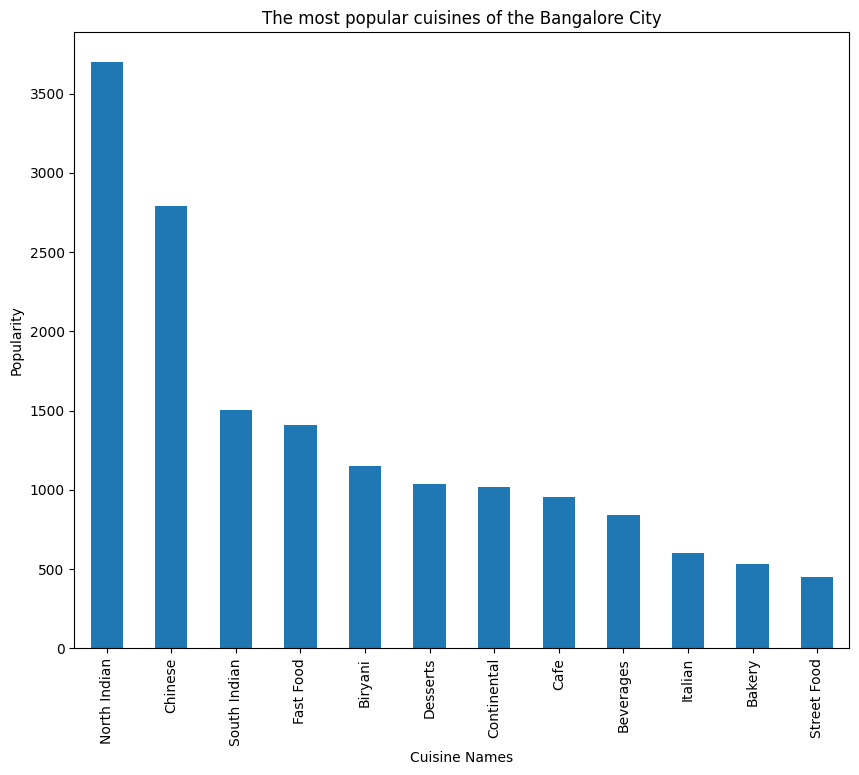

In [63]:
cuisine_list = df['Cuisines'].str.split(',\s*').explode()

total_count_cuisine = cuisine_list.value_counts()

total_count_cuisine

total_count_cuisine.sort_values(ascending=False).head(12).plot(
    kind='bar', xlabel= 'Cuisine Names',ylabel="Popularity", title="The most popular cuisines of the Bangalore City", figsize=(10, 8))

plt.show()

''' The explode() function is a convenient method available in pandas that 
it is used to transform lists-like objects (e.g., lists, Series containing lists) into rows. 
It helps to flatten the lists, expanding each element of the list to a separate row while duplicating the rest of the data accordingly.'''

## THANK YOU !!!!